# Ejercicio de Feedback Regresiones y Random Forest

## Regresión lineal

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset, het_breuschpagan, het_white
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

<h3> Apartado 1.1

In [77]:
df=pd.read_csv('precio_casas.csv')

# Calculamos la media y la desviación de la variable 'size'

media=df['size'].mean()
desviacion=df['size'].std()

print('Media: ', media)
print('Desviación: ', desviacion)

Media:  97.28
Desviación:  43.66500295684723


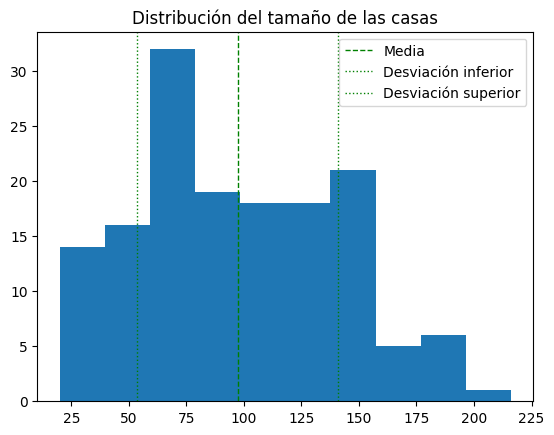

In [78]:
# Ploteamos un histograma de la variable 'size'

plt.hist(x=df['size'])
plt.axvline(media, color='g', linestyle='dashed', linewidth=1, label='Media')
plt.title('Distribución del tamaño de las casas')
plt.axvline(media-desviacion, color='g', linestyle='dotted', linewidth=1, label='Desviación inferior')
plt.axvline(media+desviacion, color='g', linestyle='dotted', linewidth=1, label='Desviación superior')
plt.legend()
plt.show()

En esta gráfica podemos observar la distribución del tamaño de las casas en nuestra base de datos. La distribución recuerda a una distribución normal, pero con notables asimetrías. Podemos observar que el rango con más frecuencia se encuentra a la izquierda de la media, es decir, el rango donde se encuentran la mayoría de casas en cuanto a tamaño es menor al tamaño medio de casas. Esto se debe a la existencia de outliers, en este caso, casas cuyo tamaño se encuentra considerablemente fuera de la media más la desviación estándar. Es decir, tenemos una distribución con asimetría positiva.

<h3>Apartado 1.2<h3>

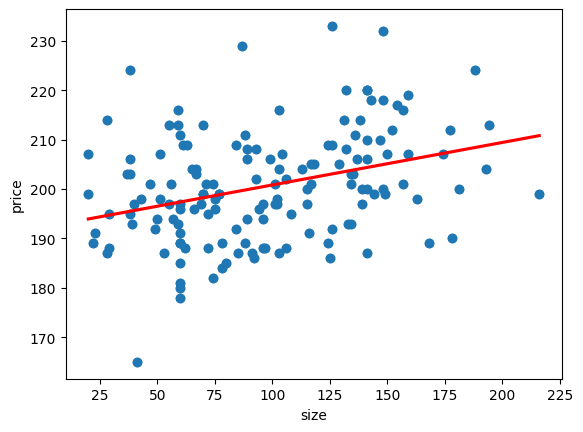

In [79]:
# Gráfica size vs price

plt.scatter(df['size'], df['price'])
plt.xlabel('size')
plt.ylabel('price')
sns.regplot(x='size', y='price', data=df,ci=None, line_kws={'color': 'red'})
plt.show()

In [80]:
# Vamos a desarrollar el modelo de regresión lineal simple
model = LinearRegression()
model.fit(df[['size']], df['price'])

# Obtenemos las predicciones y calculamos el valor de R^2
predicciones = model.predict(df[['size']])

r2_2=r2_score(df['price'], predicciones)
print('R^2: ', r2_2)

R^2:  0.11373779717535126


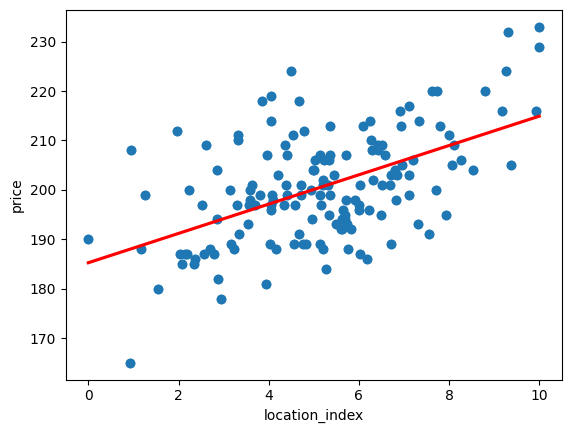

In [81]:
plt.scatter(df['location_index'], df['price'])
plt.xlabel('location_index')
plt.ylabel('price')
sns.regplot(x='location_index', y='price', data=df,ci=None, line_kws={'color': 'red'})
plt.show()

In [82]:
# Repetimos el mismo proceso para la segunda regresión
model = LinearRegression()
model.fit(df[['location_index']], df['price'])

predicciones = model.predict(df[['location_index']])

r2_2=r2_score(df['price'], predicciones)
print('R^2: ', r2_2)

R^2:  0.2881946116269445


De forma preliminar, viendo los resultados de ambas regresiones lineales, podemos concluir que 'location_index' es una mejor variable para predecir los precios para este conjunto de datos.

<h3>Apartado 1.3<h3>

In [83]:
# Dividimos el conjunto de datos en entrenamiento y prueba

x=df['location_index']
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=135)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120,), (30,), (120,), (30,))

In [84]:
# Añadimos una contante para que el modelo sea capaz de calcular el punto de corte creo??? CHEQUEARLO

x_train_unos = sm.add_constant(x_train)
x_train_unos.head()

,const,location_index
13,1.0,4.068540
86,1.0,4.029273
70,1.0,5.648168
146,1.0,4.057923
98,1.0,2.239797


In [85]:
modelo = sm.OLS(y_train, x_train_unos).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           4.63e-11
Time:                        11:29:21   Log-Likelihood:                -436.86
No. Observations:                 120   AIC:                             877.7
Df Residuals:                     118   BIC:                             883.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            184.1266      2.420     76.

In [86]:
x_test_unos = sm.add_constant(x_test)

predicciones = modelo.predict(x_test_unos)
for i in range(10):

  print('Prediccion: '+str(list(predicciones)[i]))
  print('Valor real: '+str(list(y_test)[i]))
  print('')

Prediccion: 204.66811199588219
Valor real: 209.0

Prediccion: 187.79008856595928
Valor real: 188.0

Prediccion: 202.30506195724695
Valor real: 188.0

Prediccion: 190.5650164992571
Valor real: 187.0

Prediccion: 203.02319025533637
Valor real: 197.0

Prediccion: 202.16368740992218
Valor real: 207.0

Prediccion: 202.19496470700955
Valor real: 193.0

Prediccion: 198.57245302695586
Valor real: 197.0

Prediccion: 200.97583905195202
Valor real: 195.0

Prediccion: 189.0119627599246
Valor real: 180.0



Podemos observar que el modelo es poco sólido. Obtenemos un valor de R^2 de 0,308, lo que nos indica que el modelo no es capaz de predecir de forma precisa el valor de las casas utilizando únicamente la variable 'location index'.

Vamos a comprobar si se cumplen los supuestos

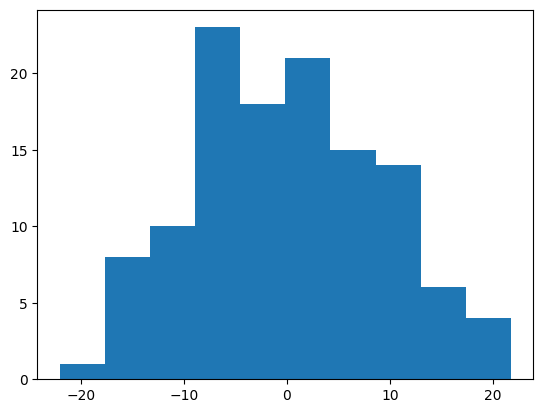

In [87]:
# Supuesto de linealidad

residuos=modelo.resid

plt.hist(x=residuos)
plt.show()

In [88]:
p_valor_reset = linear_reset(modelo).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")

P-valor del test RESET de Ramsey: 0.005220037289179166


In [89]:
# Homocedasticidad

_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos, x_train_unos)
print(f"P-valor del test de Breusch-Pagan: {pv1_bp} y {pv2_bp}")

P-valor del test de Breusch-Pagan: 0.5915932918470932 y 0.5952581862688073


In [ ]:
# Normalidad de los residuos

_,p_valor_shapiro = shapiro(residuos)
print(f"P-valor Shapiro-Wilk: {p_valor_shapiro}")

P-valor Shapiro-Wilk: 0.47038136084651727


In [ ]:
# Independecia de los residuos

estadistico_durbin_watson = durbin_watson(residuos)
print(f"Estadístico de Durbin-Watson: {estadistico_durbin_watson}")

Estadístico de Durbin-Watson: 1.8102373919411727


Como podemos observar, los test de Breusch-Pagan y de Shapiro Wilk dan p-valores bastante altos, muy por encima del valor de significancia entandar de 0,05. Esto nos indica que los supuestos de homocedasticidad y normalidad de los residuos probablamente se cumplen. Lo mismo nos pasa con el Estadístico de Durbin-Watson, que nos da un valor cercano a 2, lo que implica unos residuos prácticamente independientes. Sin embargo, el test ERSET de Ramsey nos da un valor muy pequeño, poco mayor al 0,005. Esto nos indica que la relación entre las variables no es lineal, y el modelo no es capaz de capturar correctamente la relación entre estas. Esto puede ser una indiación de que es necesario añadir más variables para que el modelo sea capaz de hacer una regresión de calidad que cumpla con nuestros supuestos.

<h3> Apartado 1.4

In [ ]:
# Vamos a realizar el mismo modelo de regresión, pero en este caso utilizando todas las variables disponibles en el dataset

x2=df.drop(columns='price')
y2=df['price']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,  train_size   = 0.8,
                                        random_state = 135,
                                        shuffle      = True)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((120, 3), (30, 3), (120,), (30,))

In [ ]:
x2_train_unos = sm.add_constant(x2_train)

modelo2 = sm.OLS(y2_train, x2_train_unos).fit()
print(modelo2.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.35e-43
Time:                        10:36:00   Log-Likelihood:                -354.74
No. Observations:                 120   AIC:                             717.5
Df Residuals:                     116   BIC:                             728.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            130.5439      3.204     40.

In [ ]:
x2_test_unos = sm.add_constant(x2_test)

predicciones2 = modelo2.predict(x2_test_unos)
for i in range(10):

  print('Prediccion: '+str(list(predicciones2)[i]))
  print('Valor real: '+str(list(y2_test)[i]))
  print('')

Prediccion: 203.62098515621767
Valor real: 209.0

Prediccion: 185.21435314417369
Valor real: 188.0

Prediccion: 188.8797228231851
Valor real: 188.0

Prediccion: 187.2748320027468
Valor real: 187.0

Prediccion: 203.52072397041064
Valor real: 197.0

Prediccion: 207.76030501445496
Valor real: 207.0

Prediccion: 192.60276952711564
Valor real: 193.0

Prediccion: 194.90479980076907
Valor real: 197.0

Prediccion: 194.39210898583562
Valor real: 195.0

Prediccion: 182.7883422985
Valor real: 180.0



Para este caso, obtenemos mejores predicciones que en caso anterior, y un R^2 para la regresión lineal de 0.829, lo que supone una mejora considerable.

Evaluación de los supuestos


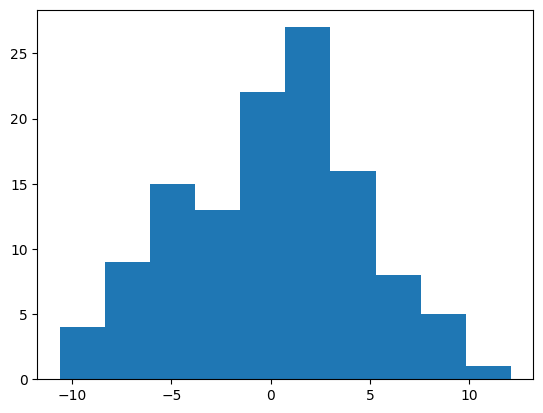

In [ ]:
# Supuesto de linealidad

residuos2=modelo2.resid

plt.hist(x=residuos2)
plt.show()

In [ ]:
p_valor_reset = linear_reset(modelo2).pvalue
print(f"P-valor del test RESET de Ramsey: {p_valor_reset}")

P-valor del test RESET de Ramsey: 0.6592435078467964


In [ ]:
# Homocedasticidad

# Para comprobar la homocedasticidad del modelo respecto a sus errores usaremos el test de Breusch-Pagan

_, pv1_bp, _, pv2_bp = het_breuschpagan(residuos2, x2_train_unos)
print(f"P-valor del test de Breusch-Pagan: {pv1_bp} y {pv2_bp}")

P-valor del test de Breusch-Pagan: 0.500572969187157 y 0.5093018450453124


In [ ]:
# Normalidad de los residuos

_,p_valor_shapiro = shapiro(residuos2)
print(f"P-valor Shapiro-Wilk: {p_valor_shapiro}")

P-valor Shapiro-Wilk: 0.5065491211246331


In [ ]:
# Independecia de los residuos

estadistico_durbin_watson = durbin_watson(residuos2)
print(f"Estadístico de Durbin-Watson: {estadistico_durbin_watson}")

Estadístico de Durbin-Watson: 1.7485095524024525


En este caso, igual que en el anterior, obtenemos buenos resultados en para los supuestos de homocedasticidad, normalidad e independencia de los residuos. Pero en este caso, el p-valor del test RESET Ramsey es de 0.659, es decir, mucho mejor que en el caso anterior, y un número suficientemente grande como para aceptar la hipótesis de linealiad. Esto nos indica que al añadir estas nuevas variables, el modelo es mejor a la hora de comprender las relaciones entre variables y a la hora de hacer predicciones sobre el precio de la casa a partir de estas.

## Regresión Logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_curve, auc

In [ ]:
df2=pd.read_csv('deteccion_cancer.csv')

df2.head()

,radius,texture,concavity,Diagnosis
0,17.99,10.38,0.3001,1
1,20.57,17.77,0.0869,1
2,19.69,21.25,0.1974,1
3,11.42,20.38,0.2414,1
4,20.29,14.34,0.1980,1


Apartado 2.1

In [ ]:
#Probabilidad de extraer un nevus maligno

df2['Diagnosis'].value_counts()

prob_maligno=df2[df2['Diagnosis']==1]['Diagnosis'].count()/df2['Diagnosis'].count()
print('Probabilidad de extraer un diagnóstico positivo: ', prob_maligno)

# odd asociado

odd=prob_maligno/(1-prob_maligno)
print('Odd asociado: ', odd)

#log(0dd)

log_odd=np.log(odd)
print('log(odd): ', log_odd)

Probabilidad de extraer un diagnóstico positivo:  0.37258347978910367
Odd asociado:  0.5938375350140055
log(odd):  -0.5211495071076269


Apartado 2.2

Coeficiente Gini:  0.9141791044776117


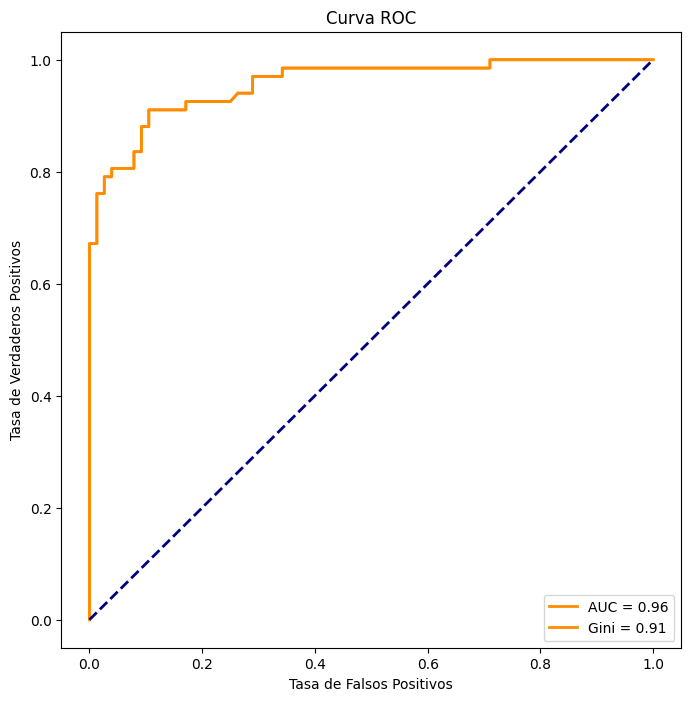

In [ ]:
# Vamos a definir los conjuntos de variables predictoras (radius	texture	concavity) y variable objetivo (diagnosis)

x=df2.drop(columns=['Diagnosis'])
y=df2['Diagnosis']

# Primer modelo de regresión logística

x1=x[['radius']]

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=135)

model=LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_prob[:10]

fpr, tpr, thresholds=roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
gini_radius = 2*roc_auc-1

print('Coeficiente Gini: ', gini_radius)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gini = {gini_radius:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Coeficiente Gini:  0.5636292223095052


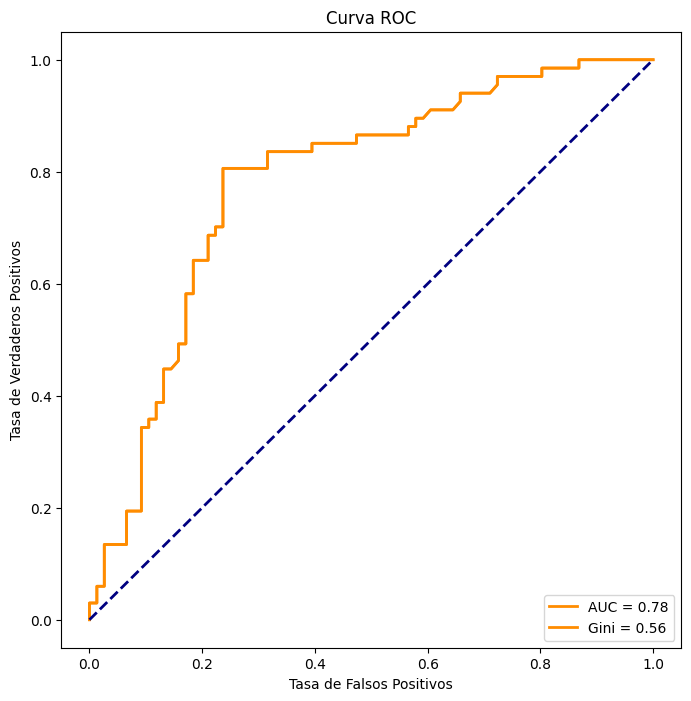

In [ ]:
# Segundo modelo

x1=x[['texture']]

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=135)

model=LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_prob[:10]

fpr, tpr, thresholds=roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
gini_texture = 2*roc_auc-1

print('Coeficiente Gini: ', gini_texture)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gini = {gini_texture:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Coeficiente Gini:  0.8992537313432836


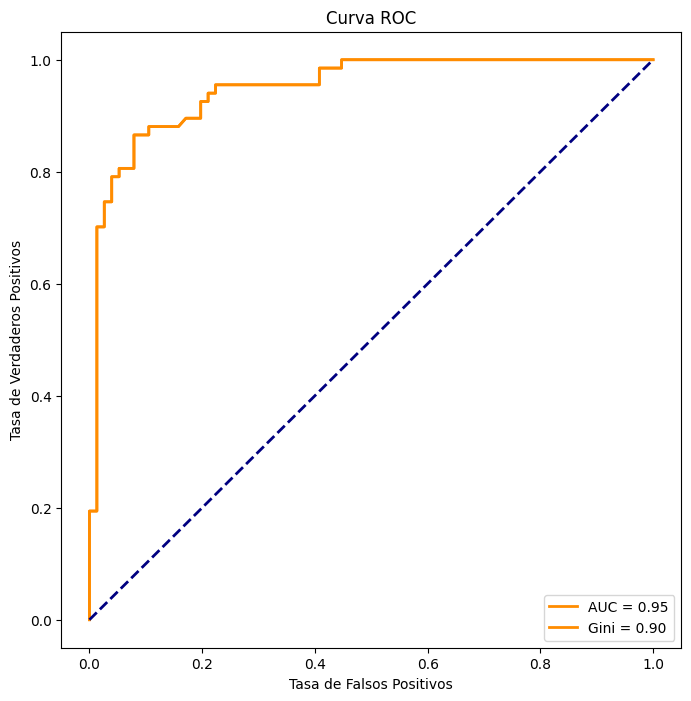

In [ ]:
# Tercer modelo

x1=x[['concavity']]

X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=135)

model=LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_prob[:10]

fpr, tpr, thresholds=roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
gini_concavity = 2*roc_auc-1

print('Coeficiente Gini: ', gini_concavity)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gini = {gini_concavity:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Como podemos observar, la regresión logística usando la variable predictora 'radius' es mejor que las otras dos, con un coeficiente de GINI de 0.914, frente a 0,899 para 'concavity' y 0,563 para 'texture'. Sin embargo cabe recalcar que la variable 'concavity' se encuentra muy próxima a 'radius' en cuanto a capacidad predictiva.

<h3> Apartado 2.3

Coeficiente Gini:  0.9418695993715631


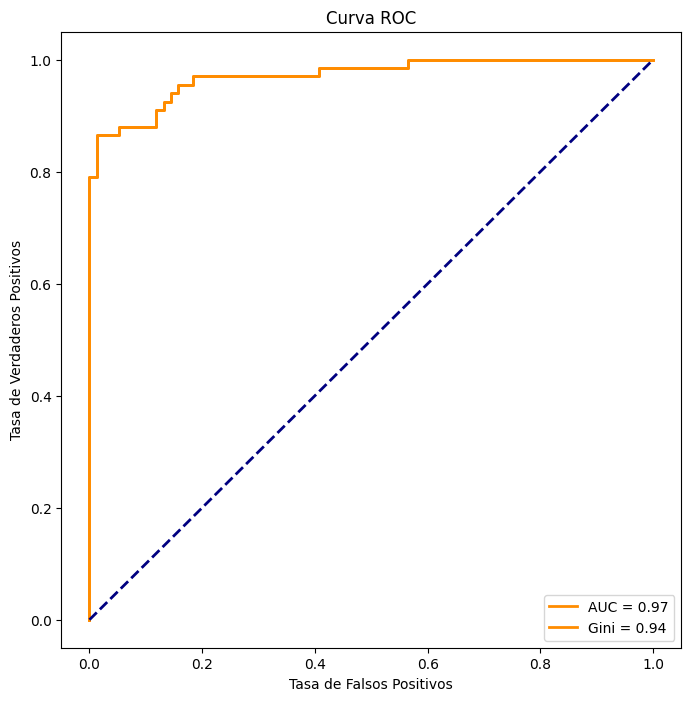

In [ ]:
# En este caso vamos a utilizar las tres variables predictoras para realizar nuestro modelo de regresión logística

x=df2.drop(columns=['Diagnosis'])
y=df2['Diagnosis']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=135)

model=LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_prob[:10]

fpr, tpr, thresholds=roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)
gini_allvar= 2*roc_auc-1

print('Coeficiente Gini: ', gini_allvar)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Gini = {gini_allvar:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Podemos observar, como era de esperar, que el modelo ha mejorado su capacidad de preduicción cuando tenemos en cuenta las tres variables, obteniendo un coeficiente GINI de 0,942, es decir, una mejora de aproximadamente 0,28 respecto al mejor modelo con una sola variable.

# 2.4

Dado que estamos hablando de un caso en el que queremos detectar un cancer, el caso que más debe penalizar a nuestro modelo es dejar pasar a alguien con cáncer como diagnóstico negativo, es decir, un falso negativo. Por lo tanto, la métrica que resulta más importante para nuestro modelo es el la sensibilidad o recall(TP/TP+FN), que mide el acierto del modelo en cuanto a su capacidad de clasificar correctamente a la gente que tiene cáncer.

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Apartado 3.1

In [ ]:
# Vamos a desarrollar nuestro árbolde  decisión

x=df2.drop(columns=['Diagnosis'])
y=df2['Diagnosis']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=135)

cart_model = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=135)
cart_model.fit(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 3), (114, 3), (455,), (114,))

In [ ]:
y_pred_cart = cart_model.predict(X_test)
y_pred_proba_cart = cart_model.predict_proba(X_test)[:, 1]

roc_auc=roc_auc_score(y_test, y_pred_proba_cart)
gini_DT=2*roc_auc-1
print('AUC: ', roc_auc)
print('Gini: ', gini_DT)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_cart))

AUC:  0.914175654853621
Gini:  0.8283513097072419
Matriz de Confusión:
 [[56  3]
 [ 7 48]]


In [ ]:
roc_auc=roc_auc_score(y_test, y_pred_proba_cart)
gini=2*roc_auc-1
print('AUC: ', roc_auc)
print('Gini: ', gini)

AUC:  0.914175654853621
Gini:  0.8283513097072419


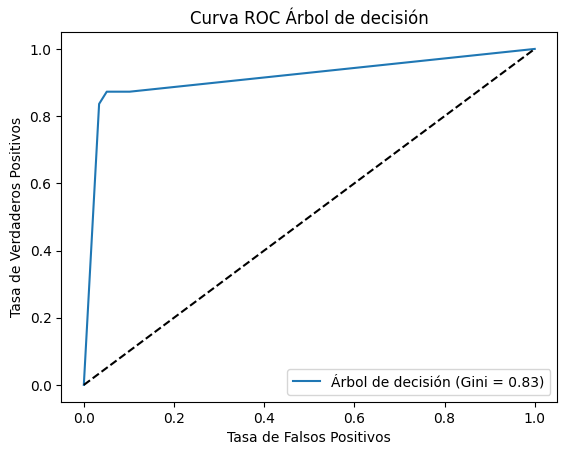

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_cart)
plt.plot(fpr_rf, tpr_rf, label="Árbol de decisión (Gini = {:.2f})".format(2*roc_auc_score(y_test, y_pred_proba_cart)-1))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Árbol de decisión")
plt.legend(loc="lower right")
plt.show()

Recall, precision y f-1 score

In [ ]:
# Vamos a definir las métricas

recall = recall_score(y_test, y_pred_cart)
precision = precision_score(y_test, y_pred_cart)
f1 = f1_score(y_test, y_pred_cart)

print('Recall: ', recall)
print('Precisión: ', precision)
print('f1 score: ', f1)

Recall:  0.8727272727272727
Precisión:  0.9411764705882353
f1 score:  0.9056603773584906


<h3> Apartado 3.2

In [ ]:
# Vamos a desarrollar nuestro modelo de Random Forest

x=df2.drop(columns=['Diagnosis'])
y=df2['Diagnosis']



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=135)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=135)
rf_model.fit(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 3), (114, 3), (455,), (114,))

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

roc_auc=roc_auc_score(y_test, y_pred_proba_rf)
gini_RF=2*roc_auc-1
print('AUC: ', roc_auc)
print('Gini: ', gini_RF)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

AUC:  0.9876733436055469
Gini:  0.9753466872110939
Matriz de Confusión:
 [[57  2]
 [ 6 49]]


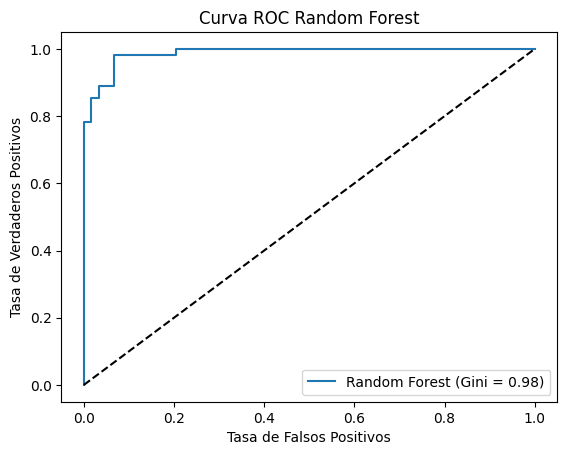

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (Gini = {:.2f})".format(2*roc_auc_score(y_test, y_pred_proba_rf)-1))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Random Forest")
plt.legend(loc="lower right")
plt.show()

Métricas de precisión

In [ ]:
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print('Recall: ', recall)
print('Precisión: ', precision)
print('f1 score: ', f1)

Recall:  0.8909090909090909
Precisión:  0.9607843137254902
f1 score:  0.9245283018867925


<h3>Comparación entre los distintos métodos utilizados<h3>

Vamos a comparar las distintas métricas de precisión entre los métodos utilizados en el apartado 2 y 3 para predecir la presencia de cáncer

In [ ]:
# Crea un diccionario con los datos de la tabla
data = {'Modelo': ['Regresión Logística (radius)', 'Regresión Logística (texture)', 'Regresión Logística (concavity)', 'Regresión Logística (radius, texture, concavity)', 'Árbol de Decisión', 'Random Forest'],
        'Coeficiente de Gini': [gini_radius, gini_texture, gini_concavity, gini_allvar, gini_DT, gini_RF]}

# Crea un DataFrame a partir del diccionario
df = pd.DataFrame.from_dict(data)

df=df.sort_values(by='Coeficiente de Gini', ascending=False)
df=df.reset_index(drop=True)
df

,Modelo,Coeficiente de Gini
0,Random Forest,0.975347
1,"Regresión Logística (radius, texture, concavity)",0.941870
2,Regresión Logística (radius),0.914179
3,Regresión Logística (concavity),0.899254
4,Árbol de Decisión,0.828351
5,Regresión Logística (texture),0.563629


Podemos ver que claramente el mejor modelo es el de Random Forest, con un coeficiente de Gini de 0,975. Este es el resultado que esperábamos para este ejercicio. En primer lugar, el hecho de que sea mejor que el árbol de decisión es un resultado que tiene sentido si tenemos en cuenta que Random Forest es un método que se compone de muchos árboles de decisión, los cuales tienen distintos conjuntos de entrenamiento y  test y analizan variables distintas en cada caso. Por lo tanto, un Random Forest no es más que una combinación de muchos árboles de decisión, por lo que es de esperar que este nos de mejores resultados y una mejor generalización, obteniendo un coeficiente de Gini considerablemente superior. En cuanto a la comparación con el caso de la regresión logística (de las tres variables, que es el mejor de todos los modelos de regresión logística), podemos observar que la diferencia de coeficiente de Gini de aproximadamente 0,33. Esta diferencia puede deberse a que Random Forest es un método que es mejor a la hora de tratar con las no linealidades y las interacciones entre variables, en comparación con la regresión logística, además de que al combinar múltiples árboles de decisión, resulta en un modelo muy robusto frente al ruido y valores atípicos. Por lo tanto, podemos concluir que para este caso en específico, el modelo Random Forest es claramente mejor que el resto.